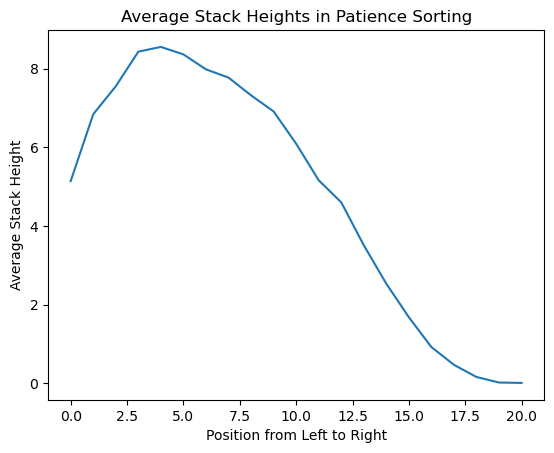

In [56]:
import numpy as np
import random
import math
import bisect
import matplotlib.pyplot as plt

#Desc: This function creates a multi-dimensional array containing all of the stacks of the patience sorting algorith. Each entry in stacks is a list of integers, which are the card values in that stack
#Input :
# permlist : list of numbers to sort
#Output :
# stacks : a list of lists of integers
def patience_sort(permlist): # define the patience sorting algorithm
    stacks = [] # initialize an empty list to store the stacks
    for x in permlist: # iterate over each element in the input list
        temp_stack = [x] # create a temp stack containing the current element
        i = bisect.bisect_left(stacks, temp_stack) # find the index where the temp stack should be inserted to maintain sorted order
        if i != len(stacks): # check if the temporary stack should inserted into an existing stack
            stacks[i].insert(0, x) # insert the current element at the top appropriate stack
        else:
            stacks.append(temp_stack) #create new stack and append the temp stack to it
    return stacks

perm_length = 100 # set the length of the permutation
stack_lengths = [] # initialize an empty list to store the lengths of the stacks

for _ in range(100):  # repeat the sorting process 100 times
    perm_pi = np.random.permutation(perm_length) # generate a random permutation of length perm_length
    perm_pi_list = perm_pi.tolist() # convert the numpy array to a list
    card_stacks = patience_sort(perm_pi_list) # perform patience sorting on the generated permutation
    stack_lengths.append([len(stack) for stack in card_stacks]) # append a list containing the lengths of all stacks to stack_lengths

max_length = max(len(stack) for stack in stack_lengths) #find the max lengths of all the stacks
stack_lengths = [stack + [0] * (max_length - len(stack)) for stack in stack_lengths] # pad each stack with zeros to make them the same length

stack_lengths = np.array(stack_lengths) # convert the list of stack lengths to an array
mean_stack_lengths = np.mean(stack_lengths, axis=0) # compute the mean stack length across all iterations

#plot the mean stack lengths and format the plot
plt.plot(mean_stack_lengths)
plt.xlabel('Position from Left to Right')
plt.ylabel('Average Stack Height')
plt.title('Average Stack Heights in Patience Sorting')
plt.show()


In [57]:
%run patience_sort_stack_heights.py

[6, 7, 7, 7, 5, 5, 5, 10, 10, 8, 6, 8, 5, 3, 3, 3, 2]
